In [103]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers

In [104]:
train_images = np.load("/kaggle/input/mais-dataset/train_images.npy") #load training images
train_labels = pd.read_csv("/kaggle/input/mais-dataset/train_labels.csv") #load train labels
train_labels = train_labels.drop(columns= ['ID'])
# train_labels = np.array(train_labels)
# train_labels = train_labels.flatten() #fix up train_labels data

test_images = np.load("/kaggle/input/mais-dataset/test_images.npy")

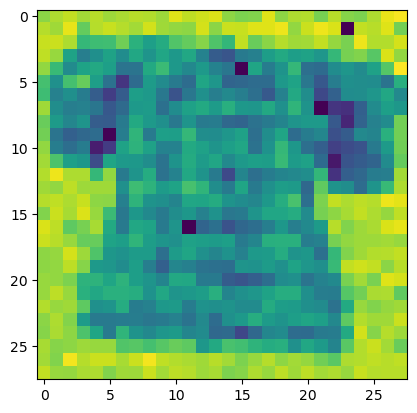

,label
0,6
1,4
2,6
3,1
4,8
...,...
49995,0
49996,9
49997,7
49998,3


In [105]:
# Use the following code block to visualize images:
def show_image(arr):
   two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
   plt.imshow(two_d, interpolation='nearest')
   plt.show()

show_image(train_images[0]) # 0 is the index of the training image you want to display
train_labels

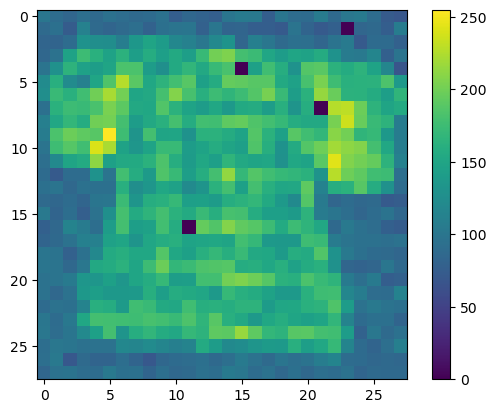

In [106]:
# You can also use this to visualize
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [107]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [109]:
#Normalize pixel values
# print(train_images)
train_images = train_images / 255
# train_images = train_images
test_images = test_images / 255
# test_images = test_images

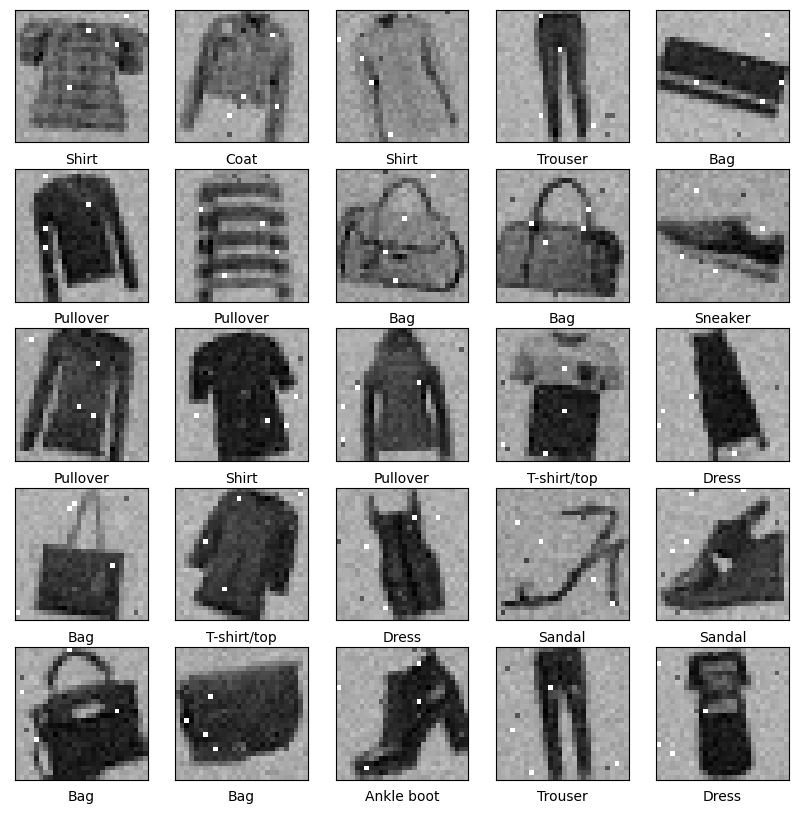

In [59]:
# Let's see a couple of images at once
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])
# plt.show()

In [118]:
#Model used

model = tf.keras.models.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  BatchNormalization(),

  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  BatchNormalization(),

  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  BatchNormalization(),

  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  BatchNormalization(),
  
  layers.Dense(10, activation='relu')
])

In [119]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# predictions = model(train_images[:1]).numpy()
# tf.nn.softmax(predictions).numpy()

In [120]:
history = model.fit(train_images, train_labels, epochs=50)
# model.fit(train_images, train_labels, epochs=20)

Epoch 1/50
1563/1563 [==============================] - 21s 11ms/step - loss: 1.2348 - accuracy: 0.5437
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9031 - accuracy: 0.6641
Epoch 3/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8368 - accuracy: 0.6915
Epoch 4/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8023 - accuracy: 0.7069
Epoch 5/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7765 - accuracy: 0.7176
Epoch 6/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7659 - accuracy: 0.7219
Epoch 7/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7525 - accuracy: 0.7273
Epoch 8/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7055 - accuracy: 0.7469
Epoch 14/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7011 - accuracy: 0.7447
Epoch 15/50
1563/1563 [==============================] - 18s 11

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1563/1563 [==============================] - 17s 11ms/step - loss: 0.6579 - accuracy: 0.7625
Epoch 29/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6582 - accuracy: 0.7612
Epoch 30/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6573 - accuracy: 0.7636
Epoch 31/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6553 - accuracy: 0.7653
Epoch 32/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6495 - accuracy: 0.7668
Epoch 33/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6504 - accuracy: 0.7677
Epoch 34/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6513 - accuracy: 0.7646
Epoch 35/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6488 - accuracy: 0.7677
Epoch 36/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6453 - accuracy: 0.7668
Epoch 37/50
1563/1563 [==============================] - 18s 12ms/s

In [21]:
# train_labels = pd.read_csv("/kaggle/input/mais-dataset/train_labels.csv")
# print(train_labels.shape)
# print(test_images.shape)
# results = model.evaluate(test_images,  train_labels, verbose=2)
# print("test loss, test acc:", results)

(50000, 2)
(20000, 28, 28)


ValueError: Data cardinality is ambiguous:
  x sizes: 20000
  y sizes: 50000
Make sure all arrays contain the same number of samples.

625/625 [==============================] - 3s 4ms/step


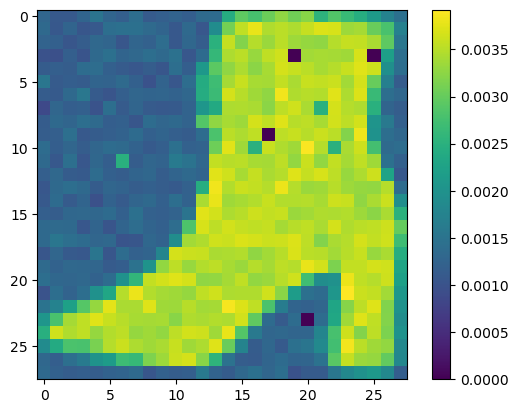

[[0.         0.         0.         ... 3.817088   0.         9.033503  ]
 [1.3743261  0.         0.         ... 2.224863   2.077695   2.0853727 ]
 [2.4208994  1.7914593  7.546586   ... 0.         1.9196746  0.        ]
 ...
 [4.1117496  2.942309   3.7808108  ... 0.         1.9779857  0.        ]
 [1.8397577  0.         3.8977962  ... 2.076528   6.406698   0.62029517]
 [3.6005406  0.         5.567502   ... 0.71241546 2.943977   0.        ]]
(20000, 10)
---------------
This image most likely belongs to Ankle boot with a 97.35 percent confidence.


In [121]:
predictions = model.predict(test_images)
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(predictions)
print(predictions.shape)
# predictions = np.array(predictions)
# predictions = predictions.flatten() #fix up train_labels data
print("---------------")
# predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
# print(score)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [122]:
# print(test_images)
print(len(predictions))
print(predictions.shape)
indices = [x for x in range(0, len(predictions))]
# indices = np.arange(len(predictions))
label_column = []
for x in range(len(predictions)):
    score = predictions[x]
    r = predictions[x].tolist().index(np.max(score))
    label_column.append(r)
# label_column = predictions[:index(np.max)]
output = pd.DataFrame({'ID': indices,'label': label_column})
# output.insert(0, 'ID', range(0, len(output)))
output.to_csv('submission.csv', index=False)
print(output)

20000
(20000, 10)
          ID  label
0          0      9
1          1      5
2          2      2
3          3      1
4          4      8
...      ...    ...
19995  19995      3
19996  19996      2
19997  19997      4
19998  19998      8
19999  19999      6

[20000 rows x 2 columns]
